In [45]:
#!pip install konlpy==0.5.2
#!pip install nltk==3.6.1
#!pip install Jpype1
#!pip install tweepy==3.10.0
#!pip install xlrd

In [46]:
import nltk
#nltk.download('punkt')

In [47]:
sentence = "NLTK is a leading platform for building Python programs to work with human language data."

# 각 문장을 토큰화 한 결과를 출력
nltk.word_tokenize(sentence)[:10]

['NLTK',
 'is',
 'a',
 'leading',
 'platform',
 'for',
 'building',
 'Python',
 'programs',
 'to']

In [48]:
# Konlpy 테스트 (라이브러리가 정상적으로 작동하는지 확인)
from konlpy.tag import Okt

tokenizer = Okt()
tokens = tokenizer.pos("아버지 가방에 들어가신다.", norm=True,stem=True)
print(tokens)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [49]:
# 2. 크롤링 데이터 전처리
import numpy as np
import pandas as pd

In [50]:
df = pd.read_excel('./result_220925_0526.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,Article
0,0,■ 새 소식개발자 업데이트 - 부정 행위 보고서 - 22.09.24 / 한 영 (N...
1,1,"데바데 패치, 이벤트, 할인, 코드, 신전"
2,2,살인마퍽애드온생존자퍽아이템 & 애드온공물 정보생존자살인마공용플레이 팁글 모음기타 팁...
3,3,데바데 마이너 갤러리 종합 정보 모음
4,4,"1. 광고, 거래글, 어그로, 분탕, 도배⦁ 어그로 및 분탕은 완장 주관 및 갤 상..."


In [51]:
articles = df['Article'].tolist()
len(articles)

78

In [52]:
articles[-1]

'112.168 얘는 진짜 레전드긴 하네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'

In [53]:
articles = ' '.join(articles)
articles[:1000]

"■ 새 소식개발자 업데이트 - 부정 행위 보고서 - 22.09.24 / 한 영 (NEW)개발자 업데이트 - 마지막 상징 - 22.09.23 / 한 영 (NEW)10월 커뮤니티 초이스 이벤트 투표 - 22.09.21 / 링크 (NEW)6.2.2 소규모 업데이트 - 22.09.13 / 한 영■ 이벤트■ 할인가을 세일 - 일부 캐릭터 및 의상 최대 50%까지 (~9.29) (NEW)■ 상점 코드CAWCAW자부심의 깃털(생&살) 기한 모름PRIDE2022진보의 깃발 부적(생&살)기한 모름PRIDE무지개 부적(생&살)기한 없음Nice69 블러드포인트 기한 없음코드 입력 방법① 상점 입장 후 왼쪽 상단 '새 소식' 탭 클릭② 우측 상단 '교환 코드' 클릭 후 코드 입력■ 비밀의 신전22.09.21 [짐승 같은 힘][어둠의 헌신][자기 증명][남자의 패기]비밀의 신전 기록소(22.1~현재)비밀의 신전 기록소(21.1~21.12)비밀의 신전 기록소(17.4~20.12) 데바데 패치, 이벤트, 할인, 코드, 신전 살인마퍽애드온생존자퍽아이템 & 애드온공물 정보생존자살인마공용플레이 팁글 모음기타 팁글 모음데바데 최적화 팁글 모음유용한 사이트 모음- 대표 사이트 5개 소개 데바데 마이너 갤러리 종합 정보 모음 1. 광고, 거래글, 어그로, 분탕, 도배⦁ 어그로 및 분탕은 완장 주관 및 갤 상태 보고 판단함⦁ 잡담글 괜찮지만 페이지당 3개까지만2. 야짤, 혐짤 등 금지⦁ 혐짤은 무조건 삭제, 야짤은 수위 보고 결정3. 네임드화, 친목 및 닉언⦁ 스샷에 나오는 닉들도 어지간해선 가려주길 권장⦁ 인게임 얘기 나누는 건 상관없지만 친목질로 간주되면 컷4. 저격 및 박제⦁ 박제는 핵, 매크로만 허용- 작성 시 증거와 계정 링크필참(외국인 & 밴 기록 있으면 필요 없음)- 누구인지 특정할 수 없게 결과창만 올리는 건 박제로 간주하지 않음- 상습적악질 유저 :예외적으로 허용,블포작 통수 : 인게임 이벤트 기간 내, 또는 상습적일 경우 예외적으로허용⦁ 저격글은 갤로그 공개한 고닉만 가능(저격용

In [54]:
len(articles)

6119

In [55]:
from konlpy.tag import Okt

tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles,norm=True,stem=True) # POS Tagging
raw_pos_tagged[:1000]

[('■', 'Foreign'),
 ('새', 'Noun'),
 ('소식', 'Noun'),
 ('개발자', 'Noun'),
 ('업데이트', 'Noun'),
 ('-', 'Punctuation'),
 ('부정', 'Noun'),
 ('행위', 'Noun'),
 ('보고서', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('24', 'Number'),
 ('/', 'Punctuation'),
 ('하다', 'Verb'),
 ('영', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('개발자', 'Noun'),
 ('업데이트', 'Noun'),
 ('-', 'Punctuation'),
 ('마지막', 'Noun'),
 ('상징', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('23', 'Number'),
 ('/', 'Punctuation'),
 ('하다', 'Verb'),
 ('영', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('10월', 'Number'),
 ('커뮤니티', 'Noun'),
 ('초이스', 'Noun'),
 ('이벤트', 'Noun'),
 ('투표', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('21', 'Number'),
 ('/', 'Punctuation'),
 ('링크', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('6.2', 'Number'),
 ('.', 'Punctuation')

In [56]:
del_list = ['하다']

word_cleaned = []

for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
        if (len(word[0]) != 1) & (word[0] not in del_list):
            word_cleaned.append(word[0])
            
word_cleaned

['소식',
 '개발자',
 '업데이트',
 '부정',
 '행위',
 '보고서',
 '22.09',
 '24',
 'NEW',
 '개발자',
 '업데이트',
 '마지막',
 '상징',
 '22.09',
 '23',
 'NEW',
 '10월',
 '커뮤니티',
 '초이스',
 '이벤트',
 '투표',
 '22.09',
 '21',
 '링크',
 'NEW',
 '6.2',
 '소규모',
 '업데이트',
 '22.09',
 '13',
 '이벤트',
 '할인',
 '가을',
 '일부',
 '캐릭터',
 '의상',
 '최대',
 '50%',
 '9.29',
 'NEW',
 '상점',
 '코드',
 'CAWCAW',
 '자부심',
 '깃털',
 '기한',
 '모름',
 'PRIDE',
 '2022',
 '진보',
 '깃발',
 '부적',
 '기한',
 '모름',
 'PRIDE',
 '무지개',
 '부적',
 '기한',
 '없다',
 'Nice',
 '69',
 '블러드',
 '포인트',
 '기한',
 '없다',
 '코드',
 '입력',
 '방법',
 '상점',
 '입장',
 '왼쪽',
 '상단',
 '소식',
 '클릭',
 '우측',
 '상단',
 '교환',
 '코드',
 '클릭',
 '코드',
 '입력',
 '비밀',
 '신전',
 '22.09',
 '21',
 '짐승',
 '같다',
 '어둠',
 '헌신',
 '자기',
 '증명',
 '남자',
 '패기',
 '비밀',
 '신전',
 '기록',
 '22.1',
 '현재',
 '비밀',
 '신전',
 '기록',
 '21.1',
 '21.12',
 '비밀',
 '신전',
 '기록',
 '17.4',
 '20.12',
 '데바',
 '패치',
 '이벤트',
 '할인',
 '코드',
 '신전',
 '살인마',
 '애드온',
 '생존자',
 '아이템',
 '애드온',
 '공물',
 '정보',
 '생존자',
 '살인마',
 '공용',
 '플레이',
 '팁글',
 '모음',
 '기타',
 '팁글',
 '모으다',
 '바데',
 '

In [57]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'소식': 2,
 '개발자': 2,
 '업데이트': 3,
 '부정': 1,
 '행위': 2,
 '보고서': 1,
 '22.09': 5,
 '24': 1,
 'NEW': 4,
 '마지막': 2,
 '상징': 1,
 '23': 1,
 '10월': 1,
 '커뮤니티': 1,
 '초이스': 1,
 '이벤트': 4,
 '투표': 1,
 '21': 2,
 '링크': 14,
 '6.2': 1,
 '소규모': 1,
 '13': 2,
 '할인': 2,
 '가을': 1,
 '일부': 1,
 '캐릭터': 2,
 '의상': 1,
 '최대': 1,
 '50%': 1,
 '9.29': 1,
 '상점': 2,
 '코드': 9,
 'CAWCAW': 1,
 '자부심': 1,
 '깃털': 1,
 '기한': 4,
 '모름': 2,
 'PRIDE': 2,
 '2022': 1,
 '진보': 1,
 '깃발': 1,
 '부적': 2,
 '무지개': 1,
 '없다': 11,
 'Nice': 1,
 '69': 1,
 '블러드': 2,
 '포인트': 1,
 '입력': 5,
 '방법': 3,
 '입장': 1,
 '왼쪽': 1,
 '상단': 2,
 '클릭': 4,
 '우측': 1,
 '교환': 2,
 '비밀': 4,
 '신전': 6,
 '짐승': 1,
 '같다': 7,
 '어둠': 1,
 '헌신': 1,
 '자기': 3,
 '증명': 2,
 '남자': 1,
 '패기': 3,
 '기록': 4,
 '22.1': 1,
 '현재': 3,
 '21.1': 1,
 '21.12': 1,
 '17.4': 1,
 '20.12': 1,
 '데바': 7,
 '패치': 1,
 '살인마': 6,
 '애드온': 4,
 '생존자': 4,
 '아이템': 1,
 '공물': 1,
 '정보': 3,
 '공용': 1,
 '플레이': 1,
 '팁글': 3,
 '모음': 4,
 '기타': 1,
 '모으다': 2,
 '바데': 2,
 '최적화': 1,
 '유용하다': 1,
 '사이트': 2,
 '대표': 1,
 '소개': 1,
 '마이너': 2,


In [58]:
# from collections import Counter

# result = Counter(word_cleaned)

# word_dic2 = dict(result)
# word_dic2

In [59]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('친목', 26),
 ('분탕', 15),
 ('링크', 14),
 ('없다', 11),
 ('되다', 10),
 ('있다', 10),
 ('코드', 9),
 ('신고', 9),
 ('개다', 8),
 ('인방', 8),
 ('시간', 8),
 ('데펠', 8),
 ('발전기', 8),
 ('같다', 7),
 ('데바', 7),
 ('돌리다', 7),
 ('신전', 6),
 ('살인마', 6),
 ('가다', 6),
 ('않다', 6),
 ('판자', 6),
 ('보다', 6),
 ('한번', 6),
 ('ㅇㅇ', 6),
 ('맞다', 6),
 ('캐릭', 6),
 ('큐브', 6),
 ('22.09', 5),
 ('입력', 5),
 ('관련', 5),
 ('리스트', 5),
 ('바로', 5),
 ('다른', 5),
 ('그렇다', 5),
 ('ㅋㅋㅋ', 5),
 ('먹다', 5),
 ('NEW', 4),
 ('이벤트', 4),
 ('기한', 4),
 ('클릭', 4),
 ('비밀', 4),
 ('기록', 4),
 ('애드온', 4),
 ('생존자', 4),
 ('모음', 4),
 ('상태', 4),
 ('금지', 4),
 ('나오다', 4),
 ('게임', 4),
 ('박제', 4),
 ('배다', 4),
 ('추가', 4),
 ('그냥', 4),
 ('넣다', 4),
 ('댓글', 4),
 ('좋다', 4),
 ('ㄱㄴ', 4),
 ('업데이트', 3),
 ('방법', 3),
 ('자기', 3),
 ('패기', 3),
 ('현재', 3),
 ('정보', 3),
 ('팁글', 3),
 ('어그', 3),
 ('완장', 3),
 ('무조건', 3),
 ('네임드', 3),
 ('저격', 3),
 ('매크로', 3),
 ('허용', 3),
 ('증거', 3),
 ('상습', 3),
 ('또는', 3),
 ('활동', 3),
 ('무한', 3),
 ('본인', 3),
 ('유동', 3),
 ('내리다', 3),
 ('너무', 3),
 ('라면', 3),
 (

In [60]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같다.

for word, count in sorted_word_dic[:50]:
    print("{0}{1}".format(word,count), end=", ")

친목26, 분탕15, 링크14, 없다11, 되다10, 있다10, 코드9, 신고9, 개다8, 인방8, 시간8, 데펠8, 발전기8, 같다7, 데바7, 돌리다7, 신전6, 살인마6, 가다6, 않다6, 판자6, 보다6, 한번6, ㅇㅇ6, 맞다6, 캐릭6, 큐브6, 22.095, 입력5, 관련5, 리스트5, 바로5, 다른5, 그렇다5, ㅋㅋㅋ5, 먹다5, NEW4, 이벤트4, 기한4, 클릭4, 비밀4, 기록4, 애드온4, 생존자4, 모음4, 상태4, 금지4, 나오다4, 게임4, 박제4, 

In [61]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [62]:
# 한글 폰트 위치 넣기
font_name = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/unfonts-core/UnBatangBold.ttf").get_name()
matplotlib.rc('font', family=font_name)

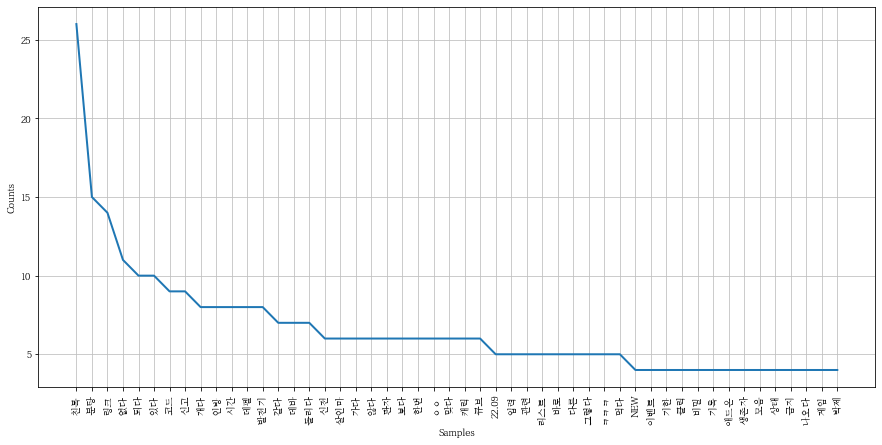

In [63]:
word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15,7)) # plot 영역(그래프 영역)의 크기 지정

word_counted.plot(50) # "plot" the graph 상위 50개 단어 보여줌